# Nuggets and `gap`

The problem is simple. You want to buy a certain amount of nuggets, and the store offers boxes of 6, 9 and 20 (as it was in MacDonnald's sometime in the last century; nowadays the boxes are not so generous). You actually want to have the exact amount of Nuggets you want to eat, no one above no one below. So for instance, you cannot buy four nuggets, not 10. But you have several ways to buy 18 nuggets: three boxes of six, or two boxes of nine.

We want to visualize first in how many ways can we buy a certain amount of Nuggets. To this end we will use the `gap` function `NrRestrictedPartitions` and the `gap` package `jupyterviz`.

In [2]:
LoadPackage("francy");

true

In [3]:
LoadPackage("jupyterviz");

true

Let us start by showing how many ways of buying Nuggets do we have in the range $\{0,\ldots,50\}$.

In [4]:
Plot([0..50], x->NrRestrictedPartitions(x,[6,9,20]), 
 rec(
title := "Different ways to buy this many Nuggets",
          xaxis := "n",
yaxis := "number of expressions of n in terms of the boxes", 
xaxis := "number of Nuggets, n",
type:="bar"
      ));

We will now overprint to the above bar diagram the minimum number of boxes required to obtain the dessired number of Nuggets. 

In [8]:
sizes:=[6,9,20];;
min:=function(l)
    if l=[] then return 0; else return(Minimum(l)); fi;
end;;
max:=function(l)
    if l=[] then return 0; else return(Maximum(l)); fi;
end;;
Plot([[0..100], x->NrRestrictedPartitions(x,sizes), 
 rec(
title := "Different ways to buy this many Nuggets",
          xaxis := "n",
yaxis := "number of expressions of n in terms of the boxes", 
xaxis := "number of Nuggets, n",
type:="bar"
)], 
[[0..100], x->min(List(RestrictedPartitions(x,sizes),Length)), 
 rec(
type:="line", name:="min # boxes",
)],
[[0..100], x->max(List(RestrictedPartitions(x,sizes),Length)), 
 rec(
type:="line", name:="max # boxes",
)]
);

Let us have a closer look at the number of ways one can buy 150 nuggets.

In [11]:
p:=RestrictedPartitions(150,sizes);;
ls:=List(p,Length);;
Plot(Set(ls),x->Length(Filtered(ls,l->l=x)), rec(type:="pie", height:=500, 
title:="Classifying the number of differnt ways to buy 150 Nuggets, depending on the number of boxes needed"));

In [12]:
Plot(Set(ls),x->Length(Filtered(ls,l->l=x)), rec(xaxis:="Número de cajas necesarias para 150 nuggets", 
yaxis:="Número de posibilidades"));

In [13]:
p;

[ [ 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6 ], [ 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6 ], [ 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6 ], [ 20, 20, 20, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 20, 20, 20, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 20, 20, 20, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 20, 20, 20, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6 ], [ 20, 20, 20, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6 ], [ 20, 20, 20, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9 ], [ 20, 20, 20, 20, 20, 20, 6, 6, 6, 6, 6 ], [ 20, 20, 20, 20, 20, 20, 9, 9,

In [14]:
LoadPackage("numericalsgps");

true

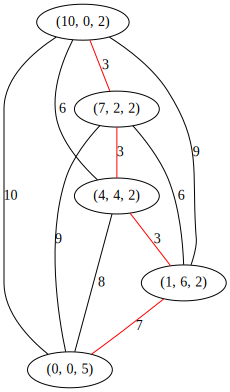

In [29]:
JupyterSplashDot(DotFactorizationGraph(FactorizationsIntegerWRTList(100,sizes)));

In [30]:
trades:=function(f,tds)
    local nonneg, sons, edges, vertices;

    nonneg:=function(l)
        return ForAll(l, x-> x>=0);
    end;

    sons:= function(fc)
        local ptds, t,fcs;
        if not(nonneg(fc)) then
            return;
        fi;
        ptds:=Filtered(tds, t->nonneg(fc-t[1]));
        for t in ptds do
            fcs:=fc-t[1]+t[2];
            Add(vertices,fcs);
            Add(edges,[fc,fcs]);
            sons(fcs);
        od;
    end;
    
    vertices:=[f];
    edges:=[];
    sons(f);
    PlotGraph(vertices, edges, 
        rec(directed:=true, layout:="circle", arrowscale:=2)
    );
    return [vertices,edges];
end;

function( f, tds ) ... end

In [43]:
ve:=trades([20,0,0], [[[3,0,0],[0,2,0]],[[10,0,0],[0,0,3]]]);

[ [ [ 20, 0, 0 ], [ 17, 2, 0 ], [ 14, 4, 0 ], [ 11, 6, 0 ], [ 8, 8, 0 ], [ 5, 10, 0 ], [ 2, 12, 0 ], [ 1, 6, 3 ], [ 4, 4, 3 ], [ 1, 6, 3 ], [ 7, 2, 3 ], [ 4, 4, 3 ], [ 1, 6, 3 ], [ 10, 0, 3 ], [ 7, 2, 3 ], [ 4, 4, 3 ], [ 1, 6, 3 ], [ 0, 0, 6 ] ], [ [ [ 20, 0, 0 ], [ 17, 2, 0 ] ], [ [ 17, 2, 0 ], [ 14, 4, 0 ] ], [ [ 14, 4, 0 ], [ 11, 6, 0 ] ], [ [ 11, 6, 0 ], [ 8, 8, 0 ] ], [ [ 8, 8, 0 ], [ 5, 10, 0 ] ], [ [ 5, 10, 0 ], [ 2, 12, 0 ] ], [ [ 11, 6, 0 ], [ 1, 6, 3 ] ], [ [ 14, 4, 0 ], [ 4, 4, 3 ] ], [ [ 4, 4, 3 ], [ 1, 6, 3 ] ], [ [ 17, 2, 0 ], [ 7, 2, 3 ] ], [ [ 7, 2, 3 ], [ 4, 4, 3 ] ], [ [ 4, 4, 3 ], [ 1, 6, 3 ] ], [ [ 20, 0, 0 ], [ 10, 0, 3 ] ], [ [ 10, 0, 3 ], [ 7, 2, 3 ] ], [ [ 7, 2, 3 ], [ 4, 4, 3 ] ], [ [ 4, 4, 3 ], [ 1, 6, 3 ] ], [ [ 10, 0, 3 ], [ 0, 0, 6 ] ] ] ]

In [44]:
PlotGraph(ve[1], ve[2], rec(directed:=true, layout:="cose", arrowscale:=2));

In [26]:
tree:=function(n,sizes)
    #local l, desc, graphTreee, d, shpr, shp, canvas, sonsf, lbl, s;
    local l,s, sons, t, ns, canvas, graphTree,shpr;


    sons:=function(m,shpm,lm)
        local i,li,mi,shp,lbl;
        if m<0 then 
            return;
        fi;
        for i in [1..ns] do
            li:=ShallowCopy(lm);
            mi:=m-sizes[i];
            if (mi in s) then
                li[i]:=li[i]+1;
                lbl:=Concatenation(String(mi)," [",JoinStringsWithSeparator(li)," ]");
                shp:=Shape(ShapeType!.CIRCLE, lbl);
                SetSize(shp,15);
                Add(graphTree,shp);
                SetParentShape(shp,shpm);
                #Add(t,[[m,lm],[mi,li]]);
                sons(mi,shp,li);
            fi;
        od;
    end;

    s:=NumericalSemigroup(sizes);
    l:=List(sizes,_->0);
    ns:=Length(sizes);
    graphTree := Graph(GraphType.TREE);
    SetCollapsed(graphTree,true);
    shpr:=Shape(ShapeType!.CIRCLE, String(n));
    SetSize(shpr,15);
    Add(shpr,FrancyMessage(Concatenation(String(n)," ",String(l))));
    Add(graphTree,shpr);
    canvas:=Canvas("Boxes");
    SetTexTypesetting(canvas, true);
    Add(canvas,graphTree);
    sons(n,shpr,l);
    return Draw(canvas);
end;

function( n, sizes ) ... end

In [27]:
tree(30,sizes);

In [28]:
FactorizationsIntegerWRTList(30,sizes);

[ [ 5, 0, 0 ], [ 2, 2, 0 ] ]